In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('creditcard.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [5]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 580,eval_metric="logloss")
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
from sklearn.metrics import roc_auc_score,average_precision_score
y_pred = classifier.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)
print("PR-AUC Score:", pr_auc)

ROC-AUC Score: 0.9740636089832668
PR-AUC Score: 0.893296813677225


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1],
    "n_estimators": [200, 400],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(
    XGBClassifier(scale_pos_weight=580),
    params,
    scoring="average_precision",  # PR-AUC
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best PR-AUC:", grid.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}
Best PR-AUC: 0.8517274698491519


In [8]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 580,eval_metric="logloss",learning_rate= 0.1, max_depth = 5, n_estimators = 400, subsample = 0.8)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [9]:
from sklearn.metrics import roc_auc_score,average_precision_score
y_pred = classifier.predict_proba(X_test)[:, 1]

pr_auc = average_precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)
print("PR-AUC Score:", pr_auc)

ROC-AUC Score: 0.9899378610476266
PR-AUC Score: 0.8951661446749258


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = (y_pred > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56855     9]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.88      0.89        98

    accuracy                           1.00     56962
   macro avg       0.95      0.94      0.95     56962
weighted avg       1.00      1.00      1.00     56962



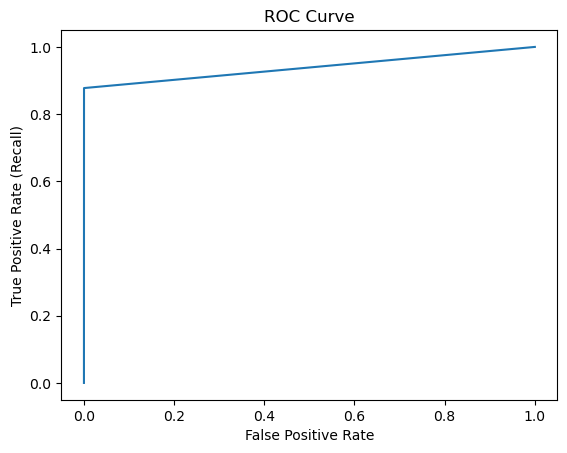

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

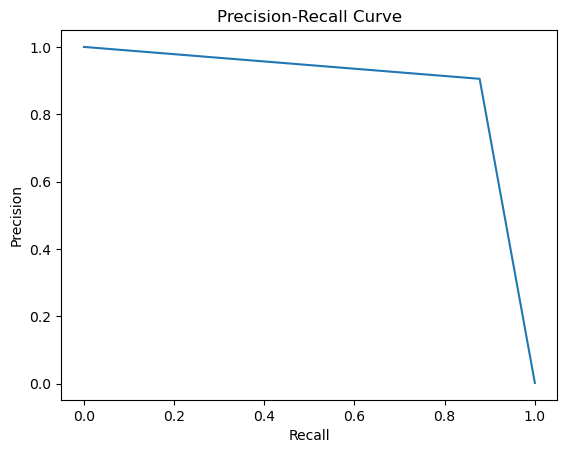

In [12]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
